In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 31 13:21:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install --upgrade --quiet pip
!pip install --upgrade --quiet datasets[audio] transformers accelerate evaluate jiwer tensorboard gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 96.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 85.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 48.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 98.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 46.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 M

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()

common_voice["train"] = load_dataset("mozilla-foundation/common_voice_11_0", "hi", split="train+validation")
common_voice["test"] = load_dataset("mozilla-foundation/common_voice_11_0", "hi", split="test")

print(common_voice)

README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

common_voice_11_0.py:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_11_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_11_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


n_shards.json:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

audio/hi/train/hi_train_0.tar:   0%|          | 0.00/114M [00:00<?, ?B/s]

audio/hi/dev/hi_dev_0.tar:   0%|          | 0.00/61.9M [00:00<?, ?B/s]

audio/hi/test/hi_test_0.tar:   0%|          | 0.00/92.2M [00:00<?, ?B/s]

audio/hi/other/hi_other_0.tar:   0%|          | 0.00/113M [00:00<?, ?B/s]

audio/hi/invalidated/hi_invalidated_0.ta(…):   0%|          | 0.00/23.4M [00:00<?, ?B/s]

transcript/hi/train.tsv:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

transcript/hi/dev.tsv:   0%|          | 0.00/627k [00:00<?, ?B/s]

transcript/hi/test.tsv:   0%|          | 0.00/824k [00:00<?, ?B/s]

transcript/hi/other.tsv:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

transcript/hi/invalidated.tsv:   0%|          | 0.00/201k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4361it [00:00, 142718.39it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2179it [00:00, 142849.82it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2894it [00:00, 127112.10it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3328it [00:00, 126192.38it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 680it [00:00, 103382.87it/s]


DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 6540
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 2894
    })
})


In [5]:
common_voice = common_voice.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "path", "segment", "up_votes"])

print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 6540
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 2894
    })
})


In [6]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [7]:
from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="Hindi", task="transcribe")

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [8]:
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="Hindi", task="transcribe")

2025-05-31 13:25:45.237602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748697945.434582      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748697945.496398      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/1bfc12b9ee30f73bf143fa237d4ba38488008883c25816876e1a35295c9575d3/hi_train_0/common_voice_hi_26008353.mp3', 'array': array([ 5.81611368e-26, -1.48634016e-25, -9.37040538e-26, ...,
        1.06425901e-07,  4.46416450e-08,  2.61450239e-09]), 'sampling_rate': 48000}, 'sentence': 'हमने उसका जन्मदिन मनाया।'}


In [10]:
from datasets import Audio

common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

In [11]:
print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/1bfc12b9ee30f73bf143fa237d4ba38488008883c25816876e1a35295c9575d3/hi_train_0/common_voice_hi_26008353.mp3', 'array': array([ 3.81639165e-17,  2.42861287e-17, -1.73472348e-17, ...,
       -1.30981789e-07,  2.63096808e-07,  4.77157300e-08]), 'sampling_rate': 16000}, 'sentence': 'हमने उसका जन्मदिन मनाया।'}


In [12]:
def prepare_dataset(batch):
    # load and resample audio data from 48 to 16kHz
    audio = batch["audio"]

    # compute log-Mel input features from input audio array
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # encode target text to label ids
    batch["labels"] = tokenizer(batch["sentence"]).input_ids
    return batch

In [13]:
common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"], num_proc=2)

Map (num_proc=2):   0%|          | 0/6540 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/2894 [00:00<?, ? examples/s]

In [14]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [15]:
model.generation_config.language = "hindi"
model.generation_config.task = "transcribe"

model.generation_config.forced_decoder_ids = None

In [16]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    decoder_start_token_id: int

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.decoder_start_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [17]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(
    processor=processor,
    decoder_start_token_id=model.config.decoder_start_token_id,
)

In [18]:
import evaluate

metric = evaluate.load("wer")

In [19]:
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [31]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [32]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-small-vedant-nlp",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=1000,
    logging_steps=25,
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [33]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=common_voice["train"],
    eval_dataset=common_voice["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

/tmp/ipykernel_35/240849381.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [34]:
processor.save_pretrained(training_args.output_dir)

[]

In [35]:
import torch
print(torch.cuda.is_available())  # Should return True


True


In [36]:
trainer.train()

Step,Training Loss
25,0.930600
50,0.785800
75,0.621600
100,0.535900
125,0.447400
150,0.417300
175,0.396600
200,0.363700
225,0.332500
250,0.319400


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3465: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=4000, training_loss=0.07898995863762684, metrics={'train_runtime': 26154.8447, 'train_samples_per_second': 2.447, 'train_steps_per_second': 0.153, 'total_flos': 1.845907654606848e+19, 'train_loss': 0.07898995863762684, 'epoch': 9.7799511002445})

In [38]:
from huggingface_hub import login
login()  # Enter your HF token

trainer.push_to_hub(
    model_name="whisper-small-hi-vedant-kangralkar",
    dataset_tags="mozilla-foundation/common_voice_11_0",
    dataset="Common Voice 11.0",
    dataset_args="config: hi, split: test",
    language="hi",
    finetuned_from="openai/whisper-small",
    tasks="automatic-speech-recognition",
)


Uploading...:   0%|          | 0.00/967M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/vedant-2012/whisper-small-vedant-nlp/commit/d5fe496bb70b2f963bcb2388ea6ed6d8cae0e80b', commit_message='End of training', commit_description='', oid='d5fe496bb70b2f963bcb2388ea6ed6d8cae0e80b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/vedant-2012/whisper-small-vedant-nlp', endpoint='https://huggingface.co', repo_type='model', repo_id='vedant-2012/whisper-small-vedant-nlp'), pr_revision=None, pr_num=None)

In [40]:
!tensorboard --logdir=./whisper-small-vedant-nlp/runs

2025-05-31 21:03:13.735696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748725393.758704     258 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748725393.765762     258 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [42]:
!pip install tensorboard

In [48]:
from tensorboard.backend.event_processing import event_accumulator

event_file = "/kaggle/working/whisper-small-vedant-nlp/runs/May31_13-41-54_de35f10393bc/events.out.tfevents.1748698921.de35f10393bc.35.2"

ea = event_accumulator.EventAccumulator(event_file)
ea.Reload()

print("Available scalar tags:")
for tag in ea.Tags()['scalars']:
    print(tag)


Available scalar tags:
train/loss
train/grad_norm
train/learning_rate
train/epoch
train/train_runtime
train/train_samples_per_second
train/train_steps_per_second
train/total_flos
train/train_loss


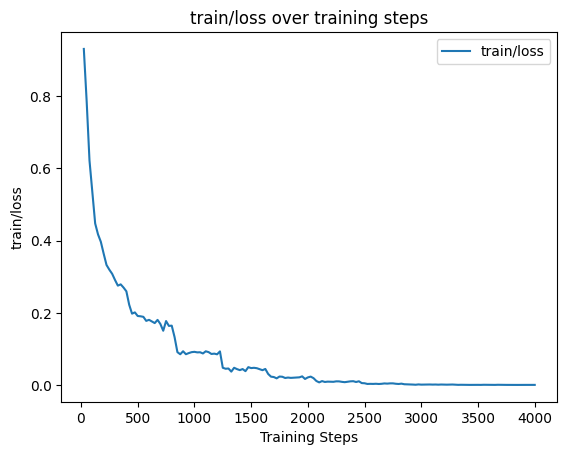

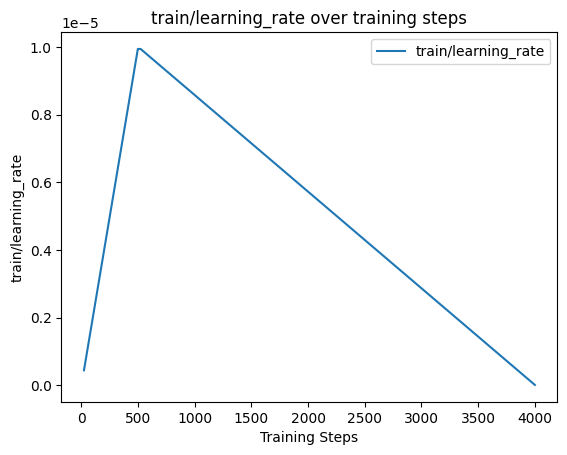

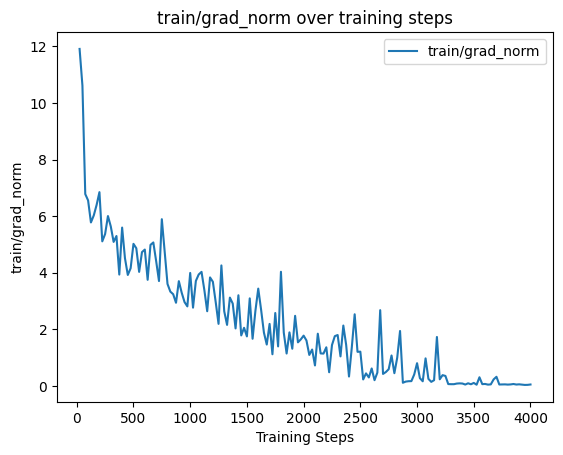

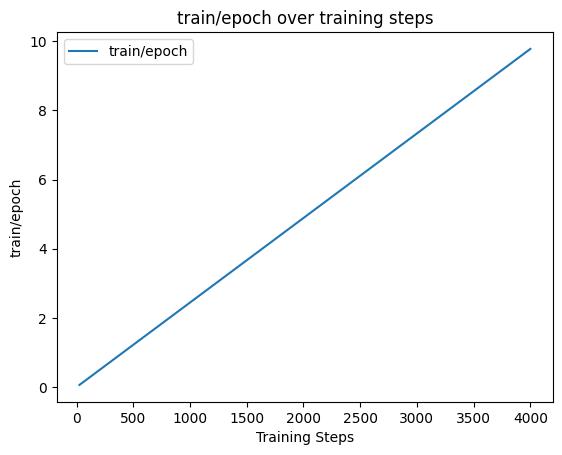

In [49]:
import matplotlib.pyplot as plt

def plot_scalar(tag):
    events = ea.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    plt.plot(steps, values, label=tag)
    plt.xlabel("Training Steps")
    plt.ylabel(tag)
    plt.title(f"{tag} over training steps")
    plt.legend()
    plt.show()

plot_scalar("train/loss")
plot_scalar("train/learning_rate")
plot_scalar("train/grad_norm")
plot_scalar("train/epoch")
